# Domain Proyek

Diabetes adalah penyakit metabolik kronis yang berdampak besar pada kualitas hidup dan sistem kesehatan masyarakat. Seiring berjalannya waktu, prevalensi diabetes terus meningkat di berbagai negara. Berdasarkan data WHO, diabetes telah menjadi salah satu penyebab utama kematian dini dan beban biaya kesehatan yang signifikan. Oleh karena itu, penting untuk melakukan deteksi dini terhadap risiko diabetes guna menghindari komplikasi yang lebih parah di masa depan.

Proyek ini bertujuan untuk mengembangkan model klasifikasi guna memprediksi risiko diabetes berdasarkan sejumlah indikator gaya hidup dan kondisi kesehatan, seperti pola makan, tingkat stres, konsumsi air, serta kepatuhan terhadap pengobatan.

# Business Understanding

**Problem Statement :**

1.   Bagaimana cara memanfaatkan informasi pola hidup guna memprediksi kategori diabetes pada seseorang?
2.   Apa faktor-faktor yang paling berkontribusi terhadap peningkatan risiko diabetes?

**Goals :**

1.   Membangun model klasifikasi untuk memprediksi risiko diabetes
2.   Mengidentifikasi fitur-fitur gaya hidup yang memiliki kontribusi paling besar terhadap peningkatan risiko diabetes, berdasarkan hasil pemodelan machine learning.

**Solution Statement :**

1.   Menerapkan beberapa algoritma machine learning seperti Decision Tree, dan Random Forest, serta membandingkan performa masing-masing model menggunakan metrik akurasi, precision, recall, dan f1-score.
2.   Menganalisis kontribusi setiap fitur input terhadap prediksi risiko diabetes menggunakan teknik seperti feature importance.


# Data Understanding


**Sumber Dataset**

Dataset diperoleh dari Kaggle:
🔗 [Diabetes Dataset – Akshay Dattatray Khare](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

**Deskripsi Data**

Dataset ini berisi informasi medis dari pasien perempuan keturunan Pima Indian yang digunakan untuk memprediksi risiko diabetes. Fitur-fitur yang tersedia mencerminkan faktor-faktor kesehatan yang relevan, antara lain:

* `Pregnancies` : Jumlah kehamilan yang pernah dialami.
* `Glucose` : Konsentrasi glukosa plasma saat puasa (mg/dL).
* `BloodPressure` : Tekanan darah diastolik (mm Hg).
* `SkinThickness` : Ketebalan lipatan kulit triceps (mm).
* `Insulin` : Kadar insulin serum 2 jam (mu U/ml).
* `BMI` : Indeks massa tubuh (berat badan dalam kg dibagi kuadrat tinggi badan dalam m).
* `DiabetesPedigreeFunction` : Nilai fungsi silsilah diabetes (menggambarkan kemungkinan diabetes berdasarkan riwayat keluarga).
* `Age` : Usia pasien (tahun).
* `Outcome` : Label target (0 = tidak diabetes, 1 = diabetes).



# Data Loading

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [3]:
#!/bin/bash
!curl -L -o diabetes-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/akshaydattatraykhare/diabetes-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9128  100  9128    0     0  12777      0 --:--:-- --:--:-- --:--:-- 12777


In [4]:
!unzip diabetes-dataset.zip

Archive:  diabetes-dataset.zip
  inflating: diabetes.csv            


In [5]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis - Deskripsi Variabel

Cakupan proses EDA sangat luas. Namun, secara umum, Anda dapat melakukan proses EDA untuk menjawab beberapa pertanyaan berikut:
- Apa saja jenis variabel pada dataset?
- Bagaimana distribusi variabel dalam dataset?
- Apakah ada missing value?
- Apakah ada fitur yang tidak berguna (redundant)?
- Bagaimana korelasi antara fitur dan target?

Deskripsi Variabel
Berdasarkan informasi dari Kaggle, variabel-variabel pada Diamond dataset adalah sebagai berikut:


* `Pregnancies` : Jumlah kehamilan yang pernah dialami.
* `Glucose` : Konsentrasi glukosa plasma saat puasa (mg/dL).
* `BloodPressure` : Tekanan darah diastolik (mm Hg).
* `SkinThickness` : Ketebalan lipatan kulit triceps (mm).
* `Insulin` : Kadar insulin serum 2 jam (mu U/ml).
* `BMI` : Indeks massa tubuh (berat badan dalam kg dibagi kuadrat tinggi badan dalam m).
* `DiabetesPedigreeFunction` : Nilai fungsi silsilah diabetes (menggambarkan kemungkinan diabetes berdasarkan riwayat keluarga).
* `Age` : Usia pasien (tahun).
* `Outcome` : Label target (0 = tidak diabetes, 1 = diabetes).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Menangani Missing Value

In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Menangani Duplicate

In [9]:
df.duplicated().sum()

np.int64(0)

## Menangani Outliers

In [10]:
# Deteksi Outlier dengan metode IQR
def detect_outliers(data):
    outlier_summary = {}
    for column in data.select_dtypes(include=np.number).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_summary[column] = len(outliers)

    return outlier_summary

# Menjalankan fungsi untuk dataset (tanpa kolom target)
indicators_columns = df.drop(columns=['risk_score'], errors='ignore')
outlier_counts = detect_outliers(indicators_columns)

# Menampilkan jumlah outlier per kolom
print("Jumlah outlier per kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Jumlah outlier per kolom:
Pregnancies: 4
Glucose: 5
BloodPressure: 45
SkinThickness: 1
Insulin: 34
BMI: 19
DiabetesPedigreeFunction: 29
Age: 9
Outcome: 0


In [11]:
# Mengelompokkan fitur numerik kecuali kolom target 'outcome'
indicators_feature = df.select_dtypes(include=np.number).drop(columns=['Outcome'], errors='ignore').columns

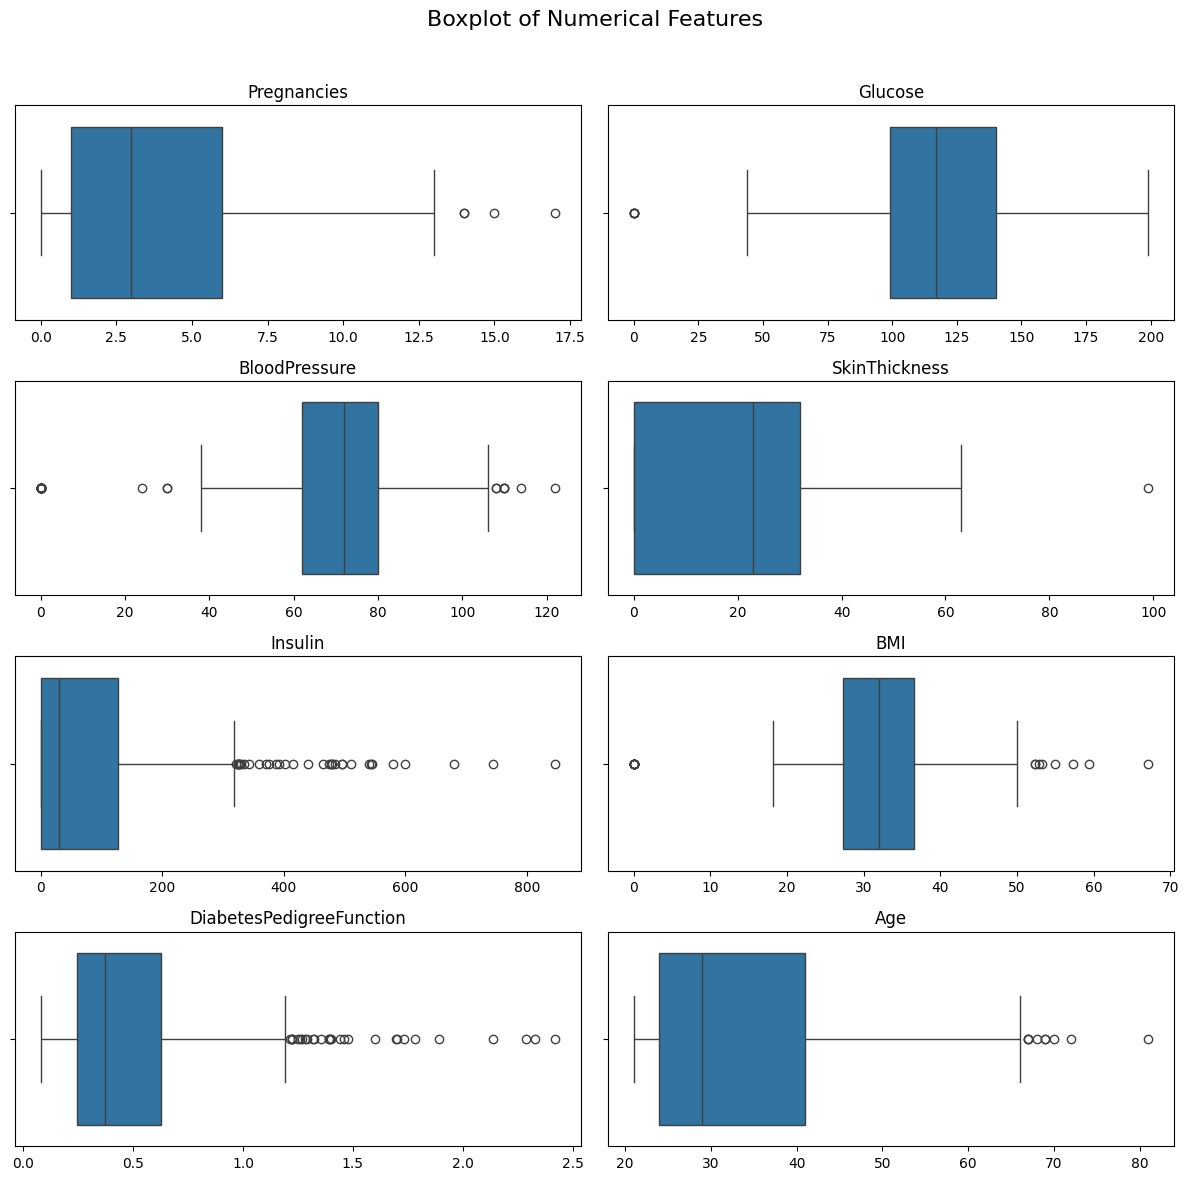

In [12]:
import math

# Hitung jumlah baris dan kolom dinamis (misalnya grid 4x2 atau 3x4 tergantung jumlah fitur)
n_features = len(indicators_feature)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

# Buat grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 3))
fig.suptitle('Boxplot of Numerical Features', fontsize=16)

# Flatten axes supaya bisa di-loop
axes = axes.flatten()

# Plot tiap fitur
for i, feature in enumerate(indicators_feature):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')

# Sembunyikan subplot kosong
for j in range(len(indicators_feature), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [13]:
# Fungsi untuk menghapus outlier dengan metode IQR
df_clean = df.copy()
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Hapus outlier
df_clean = remove_outliers(df_clean, indicators_feature)

# Tampilkan informasi perubahan
print("Outlier Berhasil Dihapus")

Outlier Berhasil Dihapus


In [14]:
print(f"Jumlah baris sebelum data cleansing: {df.shape[0]}")
print(f"Jumlah baris sesudah data cleansing: {df_clean.shape[0]}")

Jumlah baris sebelum data cleansing: 768
Jumlah baris sesudah data cleansing: 636


## Univariate Analysis

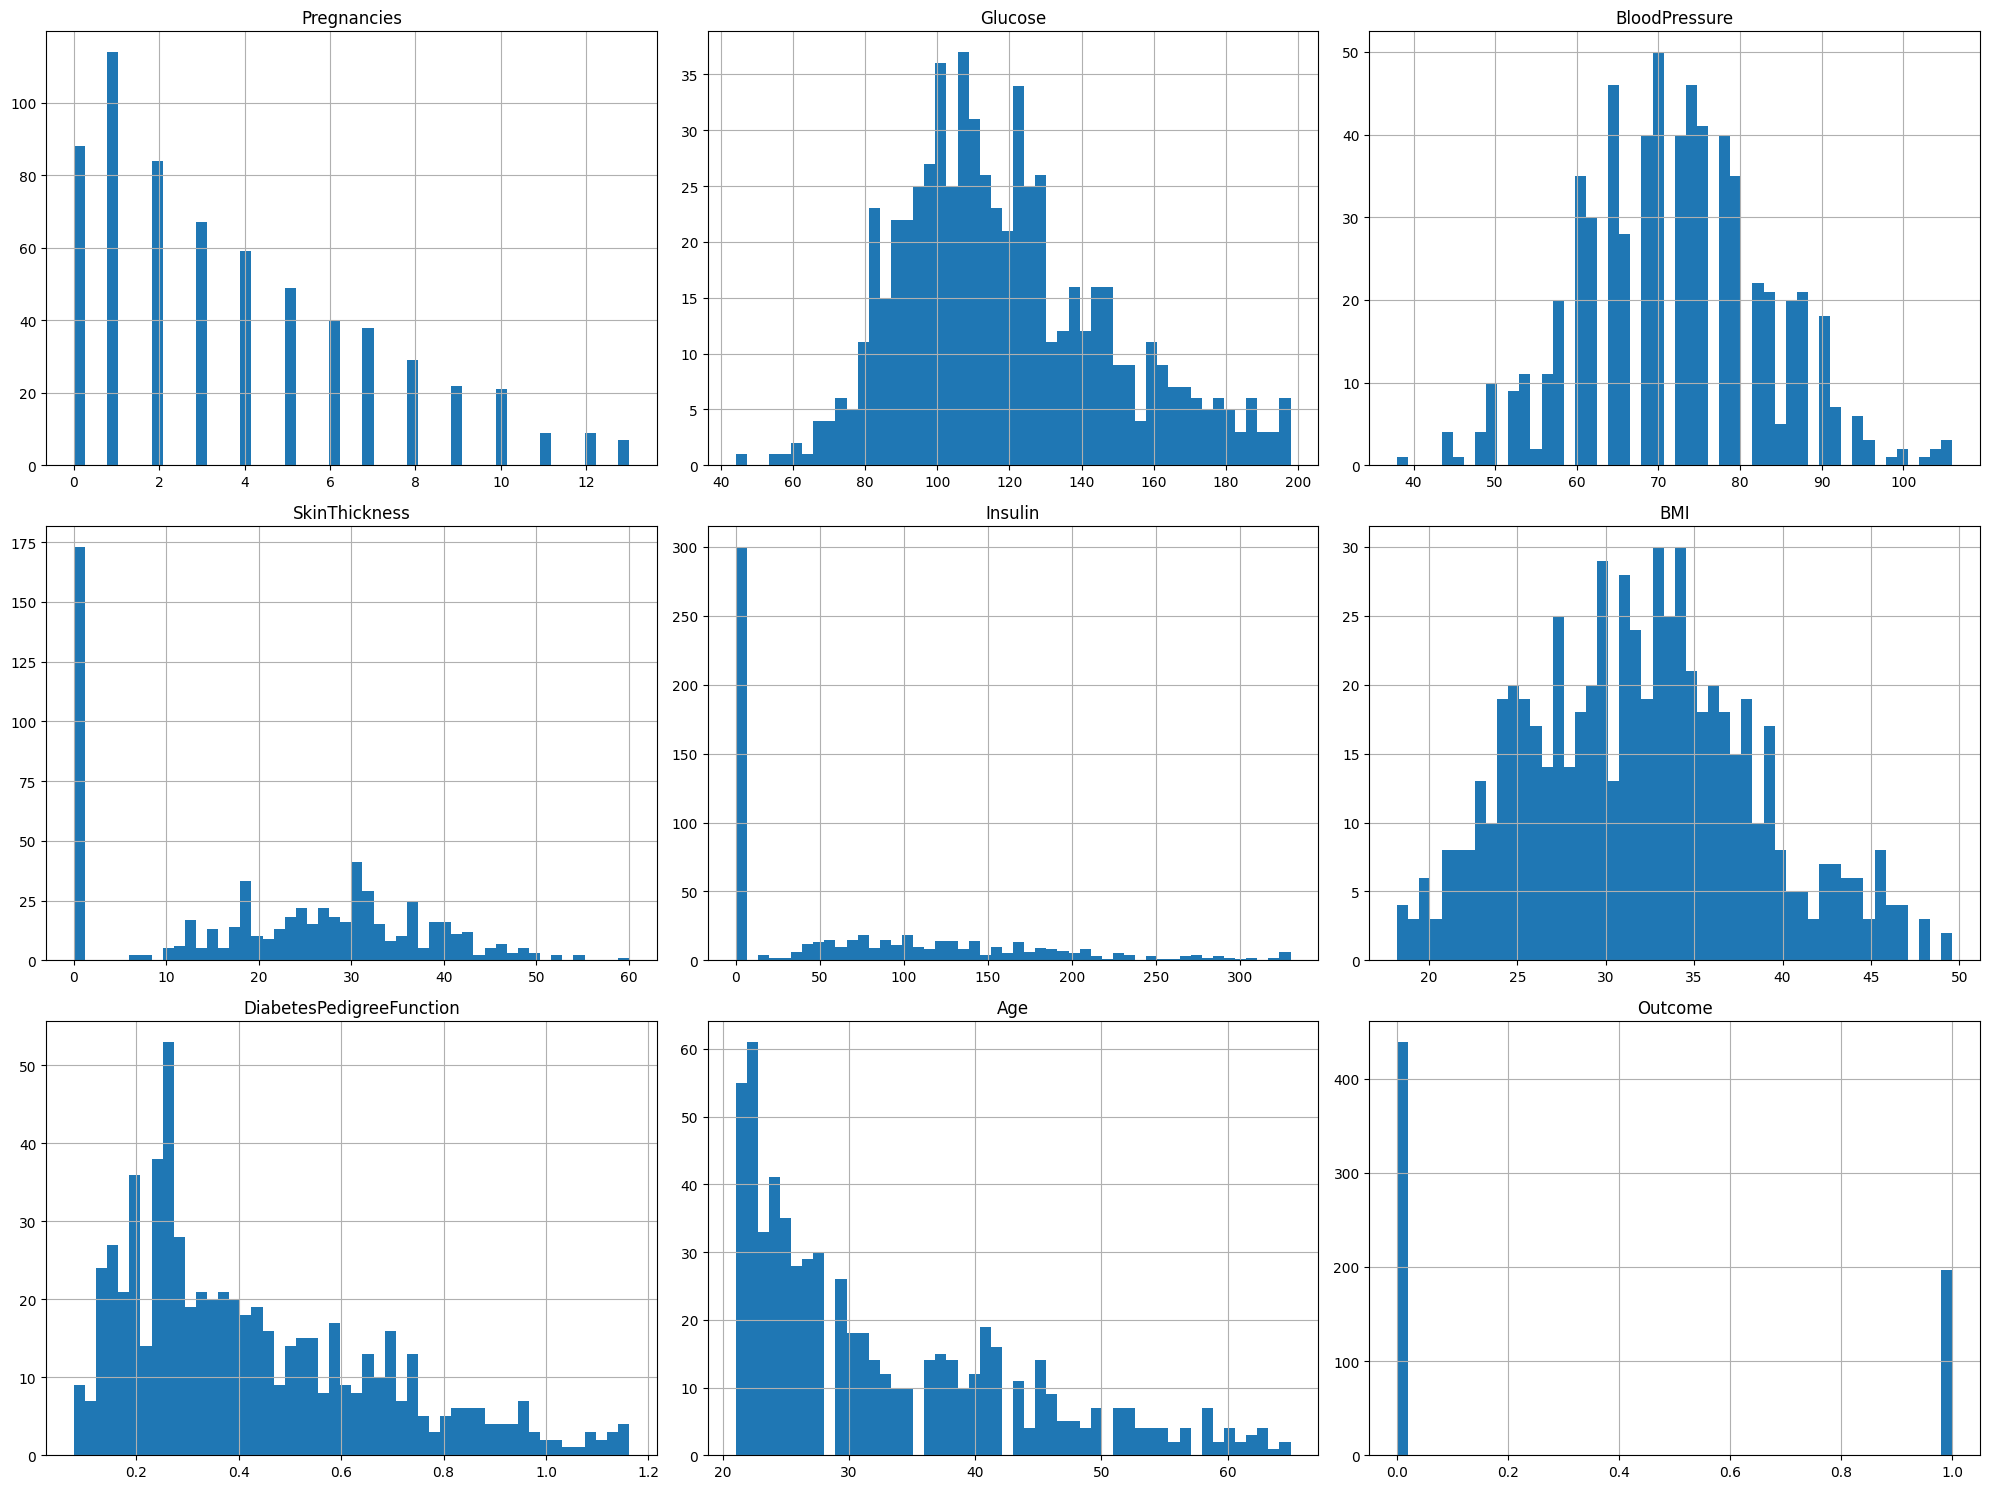

In [15]:
df_clean.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

## Multivariate Analysis

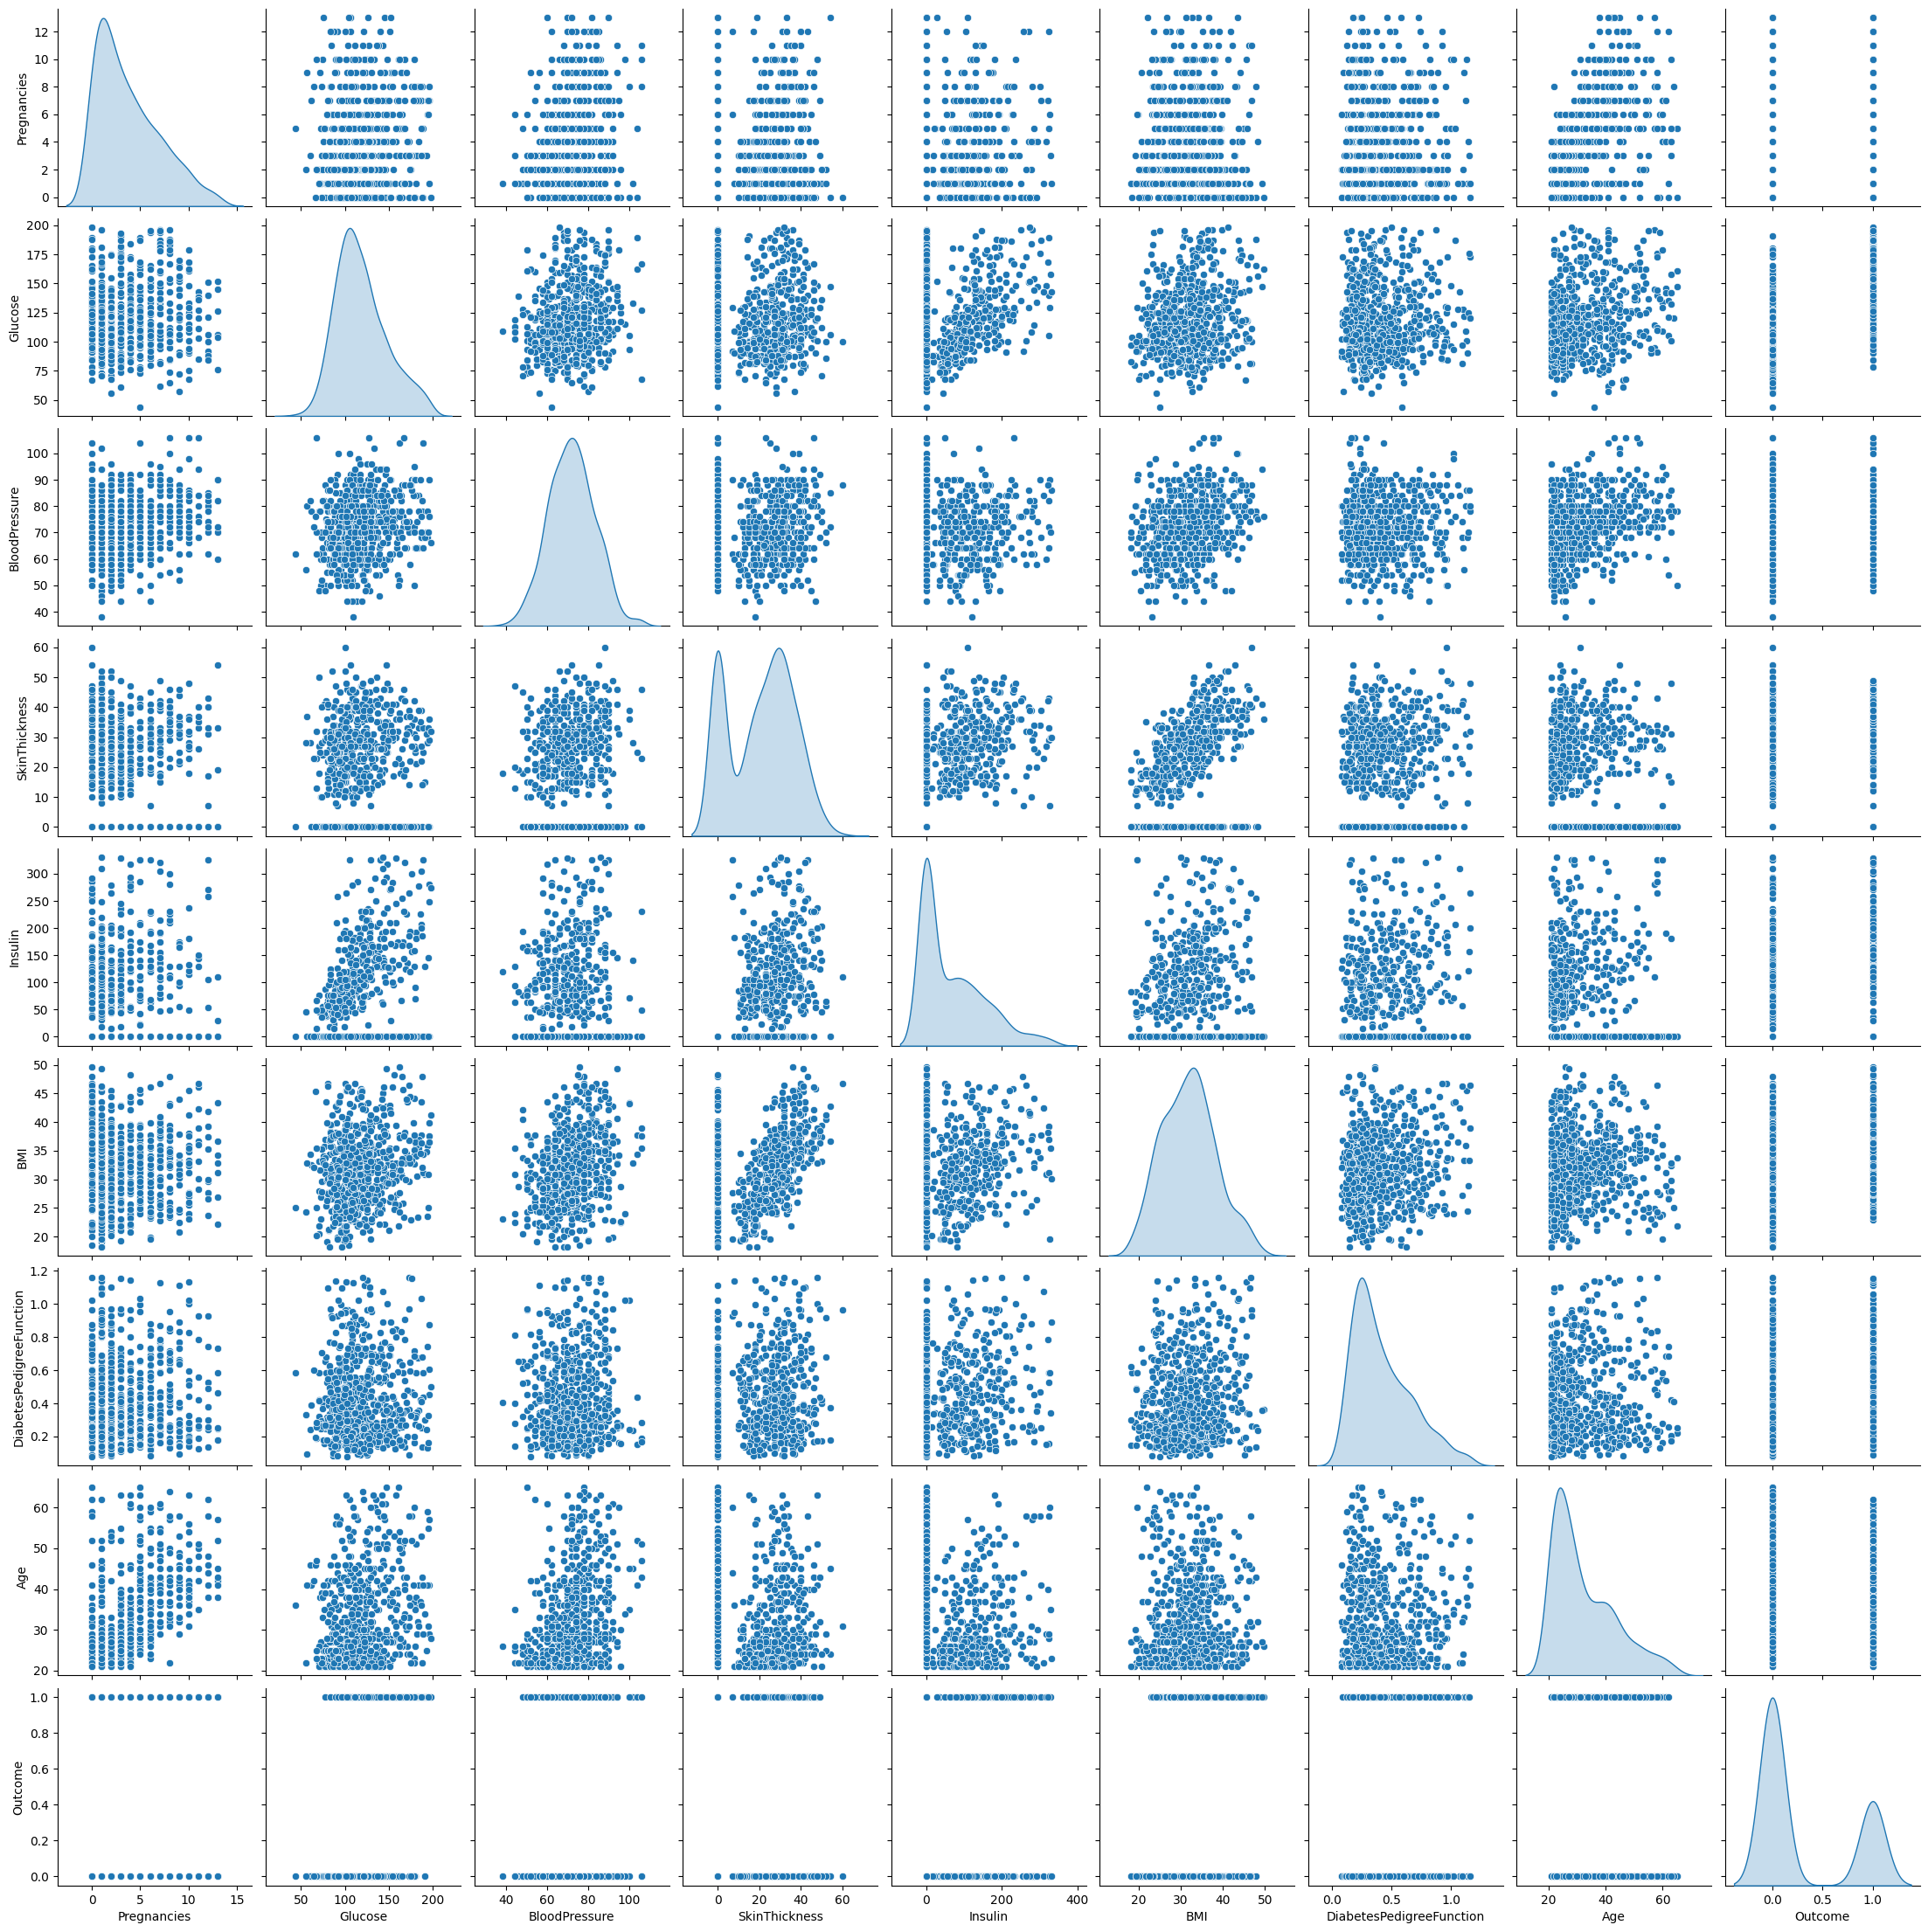

In [16]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_clean, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

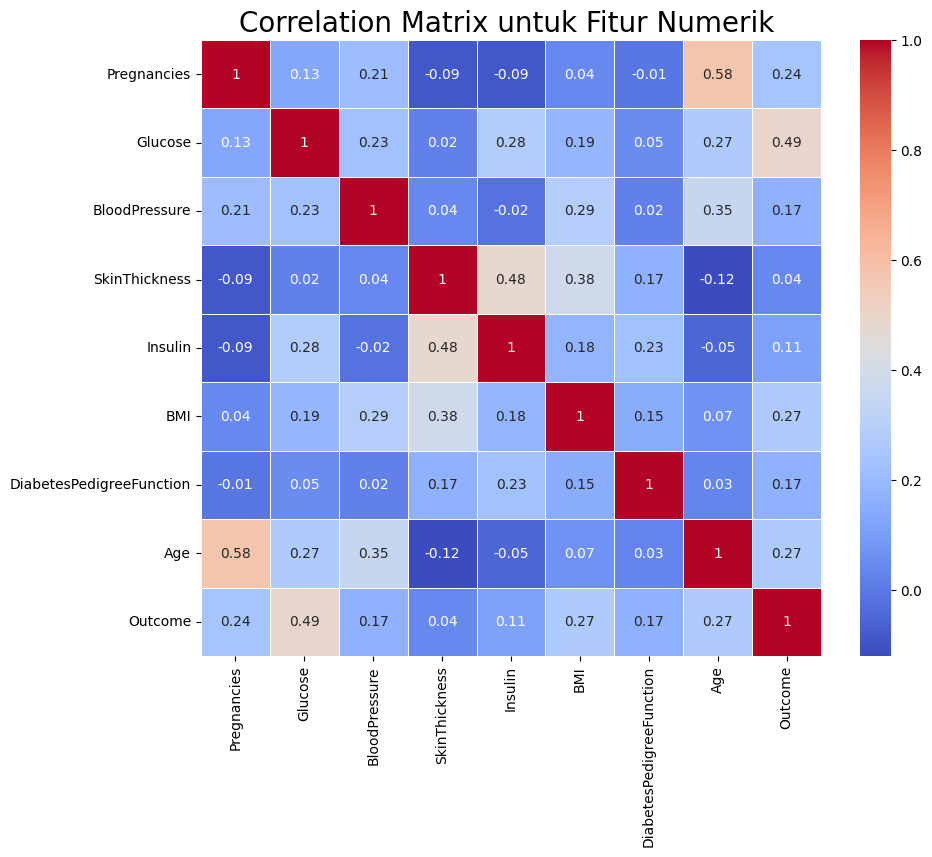

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

X = df_clean.drop(columns=["Outcome"])
y = df_clean["Outcome"]

scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaler, y)

pca = PCA(n_components= 0.95)
X_pca = pca.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size= 0.2, random_state= 42)

In [30]:
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in train dataset: 702
Total # of sample in test dataset: 176


# Training Model

Pada tahap ini, kita akan mengembangkan model machine learning dengan dua algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Kedua algoritma yang akan kita gunakan, antara lain:

- Random Forest
- Decission Tree

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10,
                           min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)
train_acc = accuracy_score(y_train, y_train_rf)
test_acc = accuracy_score(y_test, y_test_rf)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

print(f"Accuracy Data Training: {train_acc:.2f}")
print(f"Accuracy Data Testing: {test_acc:.2f}")
print(f"Mean CV Score:{cv_scores.mean():.2f}")
print(classification_report(y_test, y_test_rf))

Accuracy Data Training: 0.93
Accuracy Data Testing: 0.79
Mean CV Score:0.80
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        89
           1       0.77      0.82      0.79        87

    accuracy                           0.79       176
   macro avg       0.79      0.79      0.79       176
weighted avg       0.79      0.79      0.79       176



## Decission Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_train_dt = dt.predict(X_train)
y_test_dt = dt.predict(X_test)

train_acc_dt = accuracy_score(y_train, y_train_dt)
test_acc_dt = accuracy_score(y_test, y_test_dt)
cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5)

print(f"Accuracy Data Training: {train_acc_dt:.2f}")
print(f"Accuracy Data Testing: {test_acc_dt:.2f}")
print(f"Mean CV Score:{cv_scores_dt.mean():.2f}")
print(classification_report(y_test, y_test_dt))

Accuracy Data Training: 0.97
Accuracy Data Testing: 0.78
Mean CV Score:0.77
              precision    recall  f1-score   support

           0       0.81      0.74      0.78        89
           1       0.76      0.83      0.79        87

    accuracy                           0.78       176
   macro avg       0.79      0.78      0.78       176
weighted avg       0.79      0.78      0.78       176



# Perbandingan Model

In [21]:
# Perbandingan akurasi
acc_rf = accuracy_score(y_test, y_test_rf)
acc_dt = accuracy_score(y_test, y_test_dt)

print(f"Akurasi Random Forest: {acc_rf:.3f}")
print(f"Akurasi Decision Tree: {acc_dt:.3f}")

Akurasi Random Forest: 0.790
Akurasi Decision Tree: 0.784


📊 Hasil Perbandingan Model:

               Accuracy  Precision    Recall  F1 Score
Decision Tree  0.795455   0.797791  0.795945  0.795217
Random Forest  0.761364   0.764714  0.761979  0.760870


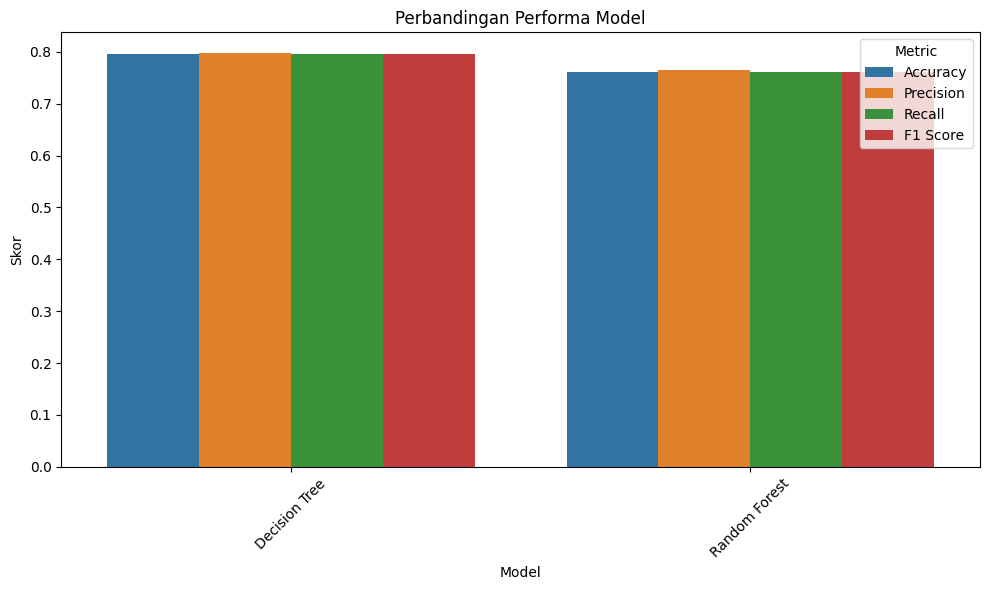

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary untuk menyimpan hasil evaluasi
model_scores = {}

# Fungsi evaluasi dan pencatatan skor
def evaluate_and_store(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Simpan skor dalam dictionary
    model_scores[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro')
    }

# Evaluasi semua model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
evaluate_and_store(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_store(dt_model, X_train, y_train, X_test, y_test, "Decision Tree")

# Menampilkan hasil perbandingan
import pandas as pd

results_df = pd.DataFrame(model_scores).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)  # Urutkan berdasarkan akurasi
print("📊 Hasil Perbandingan Model:\n")
print(results_df)

# Opsional: visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
plt.title("Perbandingan Performa Model")
plt.xlabel("Model")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

Dari keempat diagram, Decision Tree mengungguli Random Forest dalam seluruh aspek. Hal ini menjadikan Decision Tree sebagai model yang lebih baik secara keseluruhan.

Model Decision Tree adalah model terbaik dalam studi ini karena mampu memberikan:


*  Akurasi yang tinggi
*  Precision yang sangat baik
*   Keseimbangan recall dan F1 score



# Fitur

## Prediksi hasil diabetes berdasarkan inputan yang diberikan

In [23]:
import numpy as np
import pandas as pd

def infer_diabetes_risk(model, scaler, pca):
    print("Masukkan data berikut untuk memprediksi risiko diabetes Anda:\n")

    try:
        pregnancies = int(input("Jumlah kehamilan: "))
        glucose = float(input("Kadar glukosa darah (mg/dL): "))
        blood_pressure = float(input("Tekanan darah (mm Hg): "))
        skin_thickness = float(input("Ketebalan lipatan kulit triceps (mm): "))
        insulin = float(input("Kadar insulin (mu U/ml): "))
        bmi = float(input("BMI (Indeks Massa Tubuh): "))
        dpf = float(input("Fungsi silsilah diabetes (Diabetes Pedigree Function): "))
        age = int(input("Usia: "))

        fitur_input = pd.DataFrame([[
            pregnancies, glucose, blood_pressure, skin_thickness,
            insulin, bmi, dpf, age
        ]], columns=[
            'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
        ])

        fitur_input_scaled = scaler.transform(fitur_input)
        fitur_input_pca = pca.transform(fitur_input_scaled)

        pred_label = model.predict(fitur_input_pca)

        hasil = "Positif (berisiko)" if pred_label[0] == 1 else "Negatif (tidak berisiko)"
        print("\n📊 Prediksi hasil diabetes Anda adalah:", hasil)

    except ValueError:
        print("Input tidak valid. Pastikan Anda memasukkan angka.")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")


In [24]:
infer_diabetes_risk(dt_model, scaler, pca)

Masukkan data berikut untuk memprediksi risiko diabetes Anda:

Jumlah kehamilan: 1
Kadar glukosa darah (mg/dL): 120
Tekanan darah (mm Hg): 85
Ketebalan lipatan kulit triceps (mm): 30
Kadar insulin (mu U/ml): 130
BMI (Indeks Massa Tubuh): 50
Fungsi silsilah diabetes (Diabetes Pedigree Function): 0.3
Usia: 30

📊 Prediksi hasil diabetes Anda adalah: Positif (berisiko)


## Korelasi antar fitur numerik dengan hasil yang didapat

In [25]:
# Hitung korelasi antar fitur numerik terhadap 'Outcome'
correlation_matrix = df_clean.corr(numeric_only=True)
cor_target = correlation_matrix['Outcome'].drop('Outcome').sort_values(ascending=False)

print("📊 Korelasi fitur terhadap 'Outcome':")
print(cor_target)

# Ambil fitur dengan korelasi absolut > 0.3
important_features = cor_target[cor_target.abs() > 0.25]
print("\n🔥 Fitur dengan pengaruh signifikan (|korelasi| > 0.3):")
print(important_features)


📊 Korelasi fitur terhadap 'Outcome':
Glucose                     0.493355
BMI                         0.268268
Age                         0.267017
Pregnancies                 0.235631
BloodPressure               0.171178
DiabetesPedigreeFunction    0.168112
Insulin                     0.114653
SkinThickness               0.042490
Name: Outcome, dtype: float64

🔥 Fitur dengan pengaruh signifikan (|korelasi| > 0.3):
Glucose    0.493355
BMI        0.268268
Age        0.267017
Name: Outcome, dtype: float64
